In [1]:
import numpy as np

In [4]:
import random

In [8]:
X,y = [],[]

In [9]:
#creating some training data
for i in range(100):
    if i<50:
        X.append([random.randint(0,50),random.randint(50,100)])
        y.append([1])
    else:
        X.append([random.randint(50,100),random.randint(0,50)])
        y.append([0])

In [27]:
import matplotlib.pyplot as plt

In [33]:
X[86][1]

9

## Training Data with two features for Classification into 2 classes, red (1) and blue (0) as seen in the the plot 

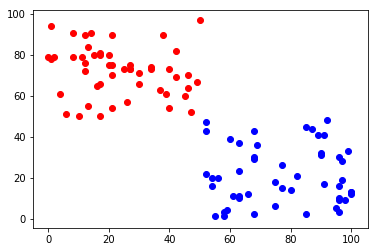

In [43]:
plt.scatter([X[i][0] for i in range(50)],[X[i][1] for i in range(50)], color = 'red')
plt.scatter([X[i+50][0] for i in range(50)],[X[i+50][1] for i in range(50)], color = 'blue')

In [57]:
total = np.array([[X[i],y[i]] for i in range(100)])

In [59]:
np.random.shuffle(total)

In [67]:
X_new, y_new = np.array([total[i][0] for i in range(100)]) ,np.array([total[i][1] for i in range(100)]) 

In [69]:
X_new = X_new/100

In [71]:
from m_l_perceptron import MLP

In [73]:
nn = MLP([2,6,8,1])

In [98]:
for i in range(100000):
    nn.train(X_new,y_new)

In [99]:
n_output= nn.feedforward(X_new)

In [100]:
for i in range(100):
    if n_output[i]<0.5:
        n_output[i]= 0
    else:
        n_output[i]= 1

In [102]:
class1_x = []
class2_x = []

In [103]:
for i in range(100):
    if n_output[i] >0.5:
        class1_x.append(X_new[i])
    else:
        class2_x.append(X_new[i])

## Classification done by neural network on the training set 

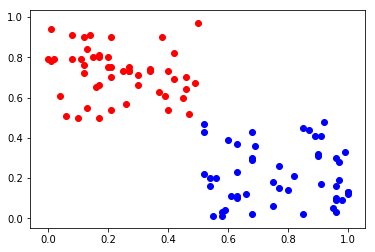

In [105]:
plt.scatter([class1_x[i][0] for i in range(len(class1_x))],[class1_x[i][1] for i in range(len(class1_x))], color = 'red')
plt.scatter([class2_x[i][0] for i in range(len(class2_x))],[class2_x[i][1] for i in range(len(class2_x))], color = 'blue')

In [109]:
tot = 100
correct = 0
for i in range(tot):
    if n_output[i] == y_new[i]:
        correct +=1
print("Accuracy on the training data :", (correct/tot)*100 ,"%")        

Accuracy on the training data : 100.0 %


### Accuracy on training data is 100% 

In [117]:
X_test = []

In [118]:
#creating some testing data
for i in range(60):
    if i<30:
        X_test.append([random.randint(0,50),random.randint(50,100)])
    else:
        X_test.append([random.randint(50,100),random.randint(0,50)])

In [119]:
np.random.shuffle(X_test)

In [121]:
X_test = np.array(X_test)

In [122]:
##scaling the data between 0 and 1
X_test = X_test/100

In [124]:
test_out = nn.feedforward(X_test)

In [125]:
for i in range(60):
    if test_out[i]<0.5:
        test_out[i]= 0
    else:
        test_out[i]= 1

In [127]:
class1_x = []
class2_x = []

In [128]:
for i in range(60):
    if test_out[i] >0.5:
        class1_x.append(X_test[i])
    else:
        class2_x.append(X_test[i])

## Classification done on testing data 

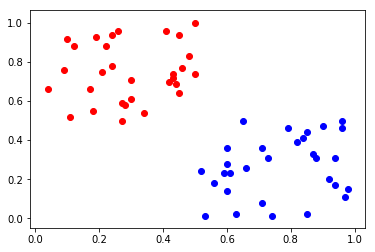

In [129]:
plt.scatter([class1_x[i][0] for i in range(len(class1_x))],[class1_x[i][1] for i in range(len(class1_x))], color = 'red')
plt.scatter([class2_x[i][0] for i in range(len(class2_x))],[class2_x[i][1] for i in range(len(class2_x))], color = 'blue')